In [4]:
import numpy as np

class Adaline:
    """
    Implementação do ADALINE (Adaptive Linear Neuron).
    
    Parâmetros
    ----------
    learning_rate : float (default: 0.01)
        Taxa de aprendizado (entre 0.0 e 1.0).
    n_iterations : int (default: 1000)
        Número de épocas (passagens sobre o dataset de treino).

    Atributos
    ---------
    weights : array-like, shape = [n_features + 1]
        Pesos após o treinamento (inclui o bias w0).
    costs : list
        Custo (Soma dos Erros Quadrados - SSE) por época.
        
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.costs = []
    
    def fit(self, X, y):
        """
        Ajusta o modelo aos dados de treinamento.

        Parâmetros
        ----------
        X : array-like, shape = [n_samples, n_features]
            Vetor de características de treinamento.
        y : array-like, shape = [n_samples]
            Vetor de rótulos alvo (ex: 1 ou -1).

        Retorna
        -------
        self : object
        
        """
        # Inicializa os pesos (w0 = bias, w1...wn = features)
        self.weights = np.zeros(X.shape[1] + 1)
        
        for i in range(self.n_iterations):
            # 1. Calcular entrada líquida e ativação linear
            net_input = self.net_input(X)
            output = self.activation(net_input)
            
            # 2. Calcular os erros (y - output)
            errors = (y - output)
            
            # 3. Atualizar os pesos (Regra Delta - Gradiente Descendente)
            # Atualiza w1 até wn (baseado em X.T.dot(errors))
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            # Atualiza w0 (bias) (baseado na soma dos erros)
            self.weights[0] += self.learning_rate * errors.sum()
            
            # 4. Calcular o custo (Soma dos Erros Quadrados - SSE)
            cost = (errors**2).sum() / 2.0
            self.costs.append(cost)
            
        return self

    # <<< ERRO 1 (INDENTAÇÃO) CORRIGIDO ABAIXO >>>
    # Estes métodos devem pertencer à Classe, não ao método 'fit'.

    def net_input(self, X):
        """Calcula a entrada líquida (z)"""
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def activation(self, X):
        """Função de ativação linear (identidade)"""
        # No Adaline, a ativação usada para o *treinamento* (cálculo do erro)
        # é a própria entrada líquida (função identidade).
        return X
    
    def predict(self, X):
        """
        Retorna o rótulo da classe após a função degrau (threshold).

        """
        # <<< ERRO 2 (CONCEITUAL) CORRIGIDO AQUI >>>
        # A *predição* do Adaline usa uma função degrau (threshold),
        # assim como o Perceptron, para classificar como 1 ou -1.
        
        # 1. Calcula a entrada líquida
        linear_output = self.net_input(X)
        
        # 2. Aplica a função degrau (threshold em 0.0)
        # Se >= 0.0, retorna 1, senão retorna -1
        return np.where(linear_output >= 0.0, 1, -1)

In [5]:
X = np.array([[2104, 3], [1600, 3], [2400, 3], [1416, 2], [3000, 4]])
y = np.array([399900, 329900, 369000, 232000, 539900])
X_std = (X - X.mean(axis=0)) / X.std(axis=0)


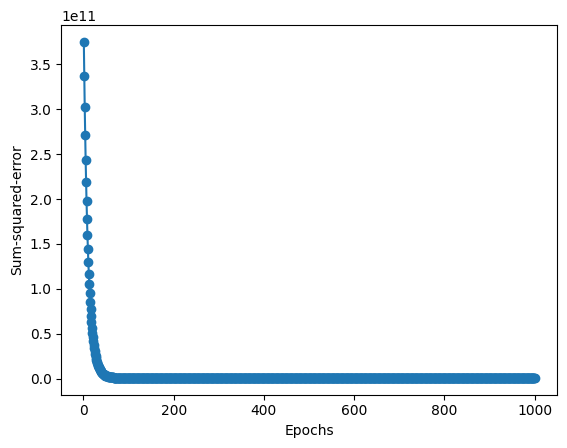

In [6]:
import matplotlib.pyplot as plt

adal = Adaline(learning_rate=0.01, n_iterations=1000)
adal.fit(X_std, y)
plt.plot(range(1, len(adal.costs) + 1), adal.costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()